In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Primero que nada bajar el dataset de la competencia de Kaggle

https://www.kaggle.com/c/santander-customer-transaction-prediction/data

In [5]:
# Si estan en COLAB descomentar y ejecutar ejecutar ambos comandos de la celda
! wget https://github.com/lab-pep-itba/santander-kaggle/blob/master/train.csv?raw=true
# ! mv train.csv\?raw\=true train.csv

zsh:1: no matches found: https://github.com/lab-pep-itba/santander-kaggle/blob/master/train.csv?raw=true


# Split Dataset

Dividir en dataset en train y validation

In [8]:
df = pd.read_csv('train.csv')

In [9]:
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [10]:
np.random.seed(42)

In [11]:
indexes = np.arange(len(df))
np.random.shuffle(indexes)

In [12]:
X_train = df.loc[indexes][:160000]
X_valid = df.loc[indexes][160000:]

In [13]:
X_train.shape, X_valid.shape

((160000, 202), (40000, 202))

In [14]:
X_train.to_csv('train_splitted.csv', index_label=False)
X_valid.to_csv('valid_splitted.csv', index_label=False)

In [15]:
X_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
119737,train_119737,0,11.0038,-4.5026,9.0662,6.4313,10.7061,-15.2857,5.1233,16.7875,...,-0.8200,3.3085,3.1358,5.0959,19.7160,-0.1801,5.8437,8.8348,17.0461,8.8190
72272,train_72272,0,12.8473,-6.1848,6.8799,2.0164,12.7998,10.2781,4.4191,15.6940,...,1.1516,3.9019,4.6616,7.6035,12.6402,-0.3037,-4.2330,9.7456,14.8337,-3.7167
158154,train_158154,0,13.1827,-0.8344,13.4689,3.9060,13.5984,4.6475,5.9659,24.0557,...,2.8737,5.8939,0.8525,8.7406,16.6641,0.8745,7.0406,8.6424,20.7107,-5.4186
65426,train_65426,0,8.2132,1.2309,11.1464,9.4524,10.2142,4.0416,5.3989,20.4527,...,6.4752,5.7442,2.1907,6.0651,10.9444,-2.0666,-7.9209,9.0522,17.1735,12.4656
30074,train_30074,1,5.5681,4.6355,15.2350,3.0718,11.8178,-15.0502,3.8357,12.0169,...,4.1796,5.6113,-0.1561,3.1010,17.4297,-1.0121,-6.5168,7.9772,18.5248,11.2771


# Análisis mínimo de datos

In [12]:
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [21]:
means = df.drop(columns=['ID_code', 'target']).mean()
stds = df.drop(columns=['ID_code', 'target']).std()

In [28]:
from matplotlib import pyplot as plt
import numpy as np

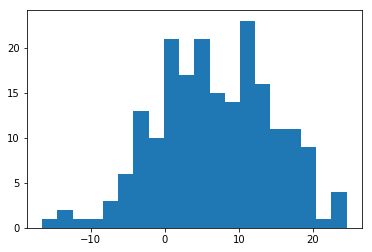

In [23]:
_ = plt.hist(means, 20)

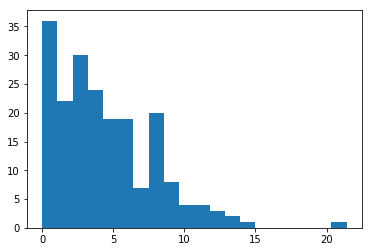

In [24]:
_ = plt.hist(stds, 20)

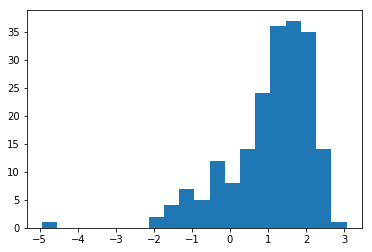

In [29]:
_ = plt.hist(np.log(stds), 20)

In [17]:
corrs = df.corr()

In [18]:
corrs

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.000000,0.052390,0.050343,0.055870,0.011055,0.010915,0.030979,0.066731,-0.003025,0.019584,...,0.055973,0.047114,-0.042858,-0.017709,-0.022838,0.028285,0.023608,-0.035303,-0.053000,0.025434
var_0,0.052390,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,0.050343,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.055870,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,-0.000991,0.002648,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.011055,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-0.000774,0.002500,0.003553,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_195,0.028285,0.002073,-0.000785,-0.001070,0.001206,0.003706,-0.001274,0.001244,0.001854,0.001396,...,0.004571,0.000870,-0.004745,-0.003143,-0.001201,1.000000,0.002517,-0.004170,-0.000536,0.002042
var_196,0.023608,0.004386,-0.000377,0.003952,-0.002800,0.000513,0.002880,0.005378,0.001045,-0.003242,...,-0.000847,0.002466,-0.001386,-0.005308,-0.005040,0.002517,1.000000,-0.000454,0.000253,0.000607
var_197,-0.035303,-0.000753,-0.004157,0.001078,0.001164,-0.000046,-0.000535,-0.003565,0.003466,-0.004583,...,-0.004974,0.000906,-0.000527,0.005068,0.000884,-0.004170,-0.000454,1.000000,0.001183,0.004991
var_198,-0.053000,-0.005776,-0.004861,-0.000877,-0.001651,-0.001821,-0.000953,-0.003025,0.000650,0.002950,...,-0.000153,-0.000067,0.003451,0.001646,0.003194,-0.000536,0.000253,0.001183,1.000000,-0.004731


In [19]:
corr_with_target = corrs['target'][1:]

In [20]:
corr_with_target.head()

var_0    0.052390
var_1    0.050343
var_2    0.055870
var_3    0.011055
var_4    0.010915
Name: target, dtype: float64

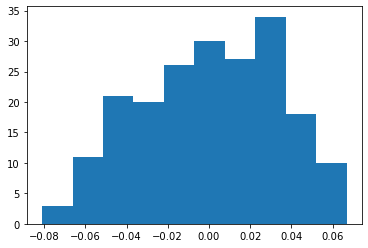

In [23]:
_ = plt.hist(corr_with_target)

In [24]:
corr_between_vars = corrs.drop(columns=['target'])[1:]

In [25]:
corr_between_vars.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
var_0,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,-0.002613,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,-0.000832,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,-0.000991,0.002648,-0.001932,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-0.000774,0.002500,0.003553,-0.000826,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506
var_4,0.001326,0.000303,0.000723,-0.000322,1.000000,-0.001368,0.000049,0.004549,0.001194,-0.000918,...,0.001514,0.004357,0.003347,0.000813,-0.000068,0.003706,0.000513,-0.000046,-0.001821,-0.000786


In [26]:
corr_vars_list = corr_between_vars.values.reshape(-1)

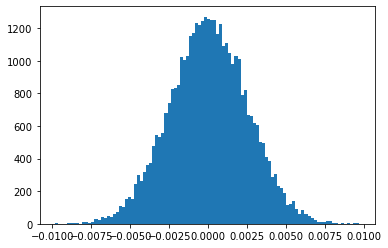

In [27]:
_ = plt.hist(corr_vars_list[corr_vars_list!=1], 100)